### Задача 1

**Дано 4 графика:**

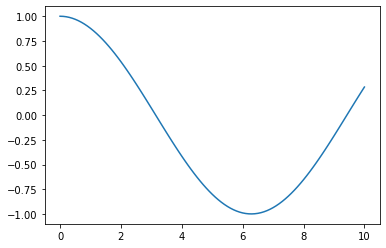

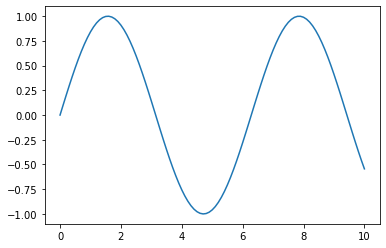

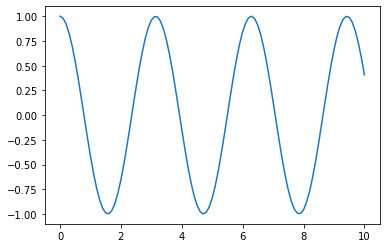

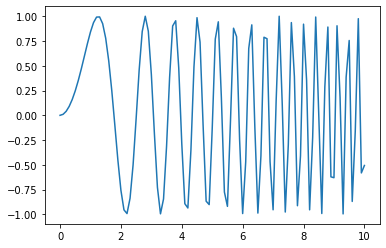

In [ ]:
import matplotlib.pyplot as plt           # Импорт модуля pyplot
import numpy as np   
import pandas as pd                     # Импорт библиотеки numpy
x = np.linspace(0, 10, 101)               # Генерация последовательности из 101 числа с шагом 0.1

plt.plot(x, np.cos(x / 2))
plt.show()

plt.plot(x, np.sin(x))
plt.show()

plt.plot(x, np.cos(x * 2))
plt.show()

plt.plot(x, np.sin(x ** 2))
plt.show()

**Приведите эти графики к следующему отображению:**

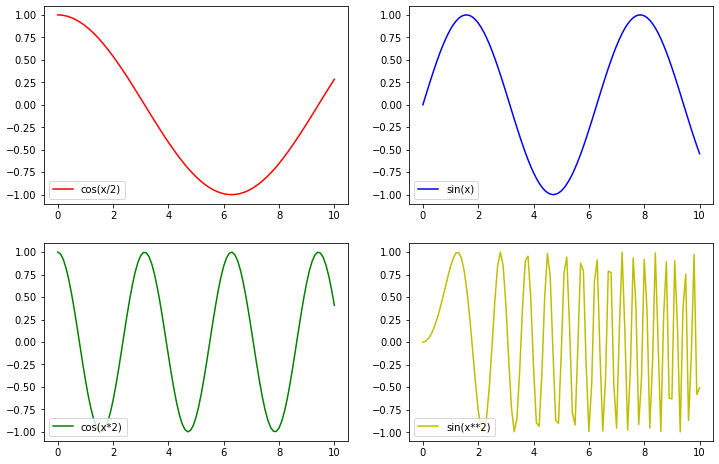

Обратите внимание:
- графики расположены по сетке
- каждый график подписан, а легенда находится слева снизу
- у графиков нет общих осей
- цвет графиков может быть произвольным

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=2, cols=2,)

fig.add_trace(
    go.Scatter(x=x,
               y=np.cos(x / 2), 
               name="np.cos(x / 2)",
               legendgroup = '1'),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=x, 
               y=np.sin(x),
               name="np.sin(x)",
               legendgroup = '2'),
    row=1, col=2
)

fig.add_trace(
    go.Scatter(x=x,
               y=np.cos(x * 2),
               name="np.cos(x * 2)",
               legendgroup = '3'),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(x=x,
               y=np.sin(x ** 2),
               name="np.sin(x ** 2)",
               legendgroup = '4'),
               row=2, col=2
)

fig.update_layout(height=800,
                  width=1000,
                  title_text="Better alternative for old-fashioned matplotlib",
                  )
fig.show()


### Задача 2

Загрузите базу данных - [ссылка на скачивание](https://drive.google.com/file/d/1PVm91uYGSyjYEQcUS6fX8SQOqvjWSf38/view).

---

При возникновении ошибки:
```
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 28: invalid start byte
```
Укажите у метода `.read_csv()` параметр `encoding='cp1250'`

---

Столбец **InvoiceDate** преобразуйте в DataTime Index, а затем удалите его.

Затем проведите анализ данных:
- вычислите общее количество ячеек
- определите тип данных каждого столбца
- определите, есть ли пропуски

In [ ]:
# upload csv file
url='https://drive.google.com/file/d/1PVm91uYGSyjYEQcUS6fX8SQOqvjWSf38/view'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id

data = pd.read_csv(dwn_url,
                   error_bad_lines=False,
                   encoding='cp1250',
                   parse_dates=['InvoiceDate'],
                   index_col='InvoiceDate')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version.





In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceDate,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 541909 entries, 2010-12-01 08:26:00 to 2011-12-09 12:50:00
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   UnitPrice    541909 non-null  float64
 5   CustomerID   406829 non-null  float64
 6   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
# how many Nones in every column
data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
print(f'Общее кол-во ячеек: {data.size:,}')

Общее кол-во ячеек: 3,793,363


### Задача 3

Вычислите количество уникальных клиентов, которые оформили заказы 7 декабря 2010 года в период с часа дня до двух часов дня.

In [ ]:
data[((data.index < '2010-12-07 13:00:01') &
      (data.index <= '2010-12-07 14:00:00'))]['CustomerID'].nunique()

424

### Задача 4

Замените значения **CustomerID** для всех клиентов из **United Kingdom** на **44**.

То есть, если **Country** = **United Kingdom**, то **CustomerID** нужно заменить на **44**. Пользоваться условными операторами (if, elif, else) нельзя.

In [ ]:
data.loc[data.Country == 'United Kingdom', 'CustomerID'] = 44

### Задача 5

Вычислите количество уникальных клиентов, которые совершали заказы в понедельники или вторники.

In [ ]:
data[((data.index.weekday == 0) | 
      (data.index.weekday == 1))]['CustomerID'].nunique()

272